In [1]:
import pandas as pd

# Load the cleaned CSV file
df = pd.read_csv('covid_dataset_by_country.csv')

# Basic information about the dataset
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187 entries, 0 to 186
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Country/Region          187 non-null    object 
 1   Confirmed               187 non-null    int64  
 2   Deaths                  187 non-null    int64  
 3   Recovered               187 non-null    int64  
 4   Active                  187 non-null    int64  
 5   New cases               187 non-null    int64  
 6   New deaths              187 non-null    int64  
 7   New recovered           187 non-null    int64  
 8   Deaths / 100 Cases      187 non-null    float64
 9   Recovered / 100 Cases   187 non-null    float64
 10  Deaths / 100 Recovered  187 non-null    float64
 11  Confirmed last week     187 non-null    int64  
 12  1 week change           187 non-null    int64  
 13  1 week % increase       187 non-null    float64
 14  WHO Region              187 non-null    ob

C:\Python311\Lib\site-packages\pandas\core\nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


In [3]:
# Print all column names to verify
print(df.columns)

Index(['Country/Region', 'Confirmed', 'Deaths', 'Recovered', 'Active',
       'New cases', 'New deaths', 'New recovered', 'Deaths / 100 Cases',
       'Recovered / 100 Cases', 'Deaths / 100 Recovered',
       'Confirmed last week', '1 week change', '1 week % increase',
       'WHO Region'],
      dtype='object')


In [22]:
import pandas as pd

# Rename some columns
df = df.rename(columns={
    'Country/Region': 'Country',
    'Confirmed': 'Cases',
    'Deaths / 100 Cases': 'Deaths_100_cases',
    'Recovered / 100 Cases': 'Recovered_100_cases',
    'Deaths / 100 Recovered': 'Deaths_100_recovered',
    'WHO Region': 'Continent'
})

# Display the new column names
print("New column names:", df.columns)

New column names: Index(['Country', 'Cases', 'Deaths', 'Recovered', 'Active', 'New cases',
       'New deaths', 'New recovered', 'Deaths_100_cases',
       'Recovered_100_cases', 'Deaths_100_recovered', 'Confirmed last week',
       '1 week change', '1 week % increase', 'Continent'],
      dtype='object')


In [7]:
# DATA VALIDATION
# Check for missing values in columns
print(df.isnull().sum())

# Validate unique countries
print(df['Country'].unique())

# Ensure the data types are correct
print(df.dtypes)

Country                 0
Confirmed               0
Deaths                  0
Recovered               0
Active                  0
New cases               0
New deaths              0
New recovered           0
Deaths_100_cases        0
Recovered_100_cases     0
Deaths_100_recovered    0
Confirmed last week     0
1 week change           0
1 week % increase       0
WHO Region              0
dtype: int64
['Afghanistan' 'Albania' 'Algeria' 'Andorra' 'Angola'
 'Antigua and Barbuda' 'Argentina' 'Armenia' 'Australia' 'Austria'
 'Azerbaijan' 'Bahamas' 'Bahrain' 'Bangladesh' 'Barbados' 'Belarus'
 'Belgium' 'Belize' 'Benin' 'Bhutan' 'Bolivia' 'Bosnia and Herzegovina'
 'Botswana' 'Brazil' 'Brunei' 'Bulgaria' 'Burkina Faso' 'Burma' 'Burundi'
 'Cabo Verde' 'Cambodia' 'Cameroon' 'Canada' 'Central African Republic'
 'Chad' 'Chile' 'China' 'Colombia' 'Comoros' 'Congo (Brazzaville)'
 'Congo (Kinshasa)' 'Costa Rica' "Cote d'Ivoire" 'Croatia' 'Cuba' 'Cyprus'
 'Czechia' 'Denmark' 'Djibouti' 'Dominica' 'Domi

In [11]:
# Check for inconsistencies or unexpected values in continents and countries
df['Continent'].value_counts()
df['Country'].value_counts()

Country
Afghanistan    1
Pakistan       1
Nepal          1
Netherlands    1
New Zealand    1
              ..
Georgia        1
Germany        1
Ghana          1
Greece         1
Zimbabwe       1
Name: count, Length: 187, dtype: int64

In [24]:
# DATA EXPLORATION
# Total number of confirmed cases and deaths worldwide
total_confirmed = df['Cases'].sum()
total_deaths = df['Deaths'].sum()
print(f"Total confirmed cases: {total_confirmed}")
print(f"Total confirmed deaths: {total_deaths}")

# Countries with the highest number of confirmed cases and deaths
top_countries_cases = df.groupby('Country')['Cases'].sum().sort_values(ascending=False).head(10)
top_countries_deaths = df.groupby('Country')['Deaths'].sum().sort_values(ascending=False).head(10)
print("Top 10 countries by confirmed cases:\n", top_countries_cases)
print("Top 10 countries by confirmed deaths:\n", top_countries_deaths)

Total confirmed cases: 16480485
Total confirmed deaths: 654036
Top 10 countries by confirmed cases:
 Country
US                4290259
Brazil            2442375
India             1480073
Russia             816680
South Africa       452529
Mexico             395489
Peru               389717
Chile              347923
United Kingdom     301708
Iran               293606
Name: Cases, dtype: int64
Top 10 countries by confirmed deaths:
 Country
US                148011
Brazil             87618
United Kingdom     45844
Mexico             44022
Italy              35112
India              33408
France             30212
Spain              28432
Peru               18418
Iran               15912
Name: Deaths, dtype: int64


C:\Python311\Lib\site-packages\pandas\core\nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


              Cases         Deaths     Recovered        Active     New cases  \
count  1.870000e+02     187.000000  1.870000e+02  1.870000e+02    187.000000   
mean   8.813094e+04    3497.518717  5.063148e+04  3.400194e+04   1222.957219   
std    3.833187e+05   14100.002482  1.901882e+05  2.133262e+05   5710.374790   
min    1.000000e+01       0.000000  0.000000e+00  0.000000e+00      0.000000   
25%    1.114000e+03      18.500000  6.265000e+02  1.415000e+02      4.000000   
50%    5.059000e+03     108.000000  2.815000e+03  1.600000e+03     49.000000   
75%    4.046050e+04     734.000000  2.260600e+04  9.149000e+03    419.500000   
max    4.290259e+06  148011.000000  1.846641e+06  2.816444e+06  56336.000000   

        New deaths  New recovered  Deaths_100_cases  Recovered_100_cases  \
count   187.000000     187.000000        187.000000           187.000000   
mean     28.957219     933.812834          3.019519            64.820535   
std     120.037173    4197.719635          3.454302

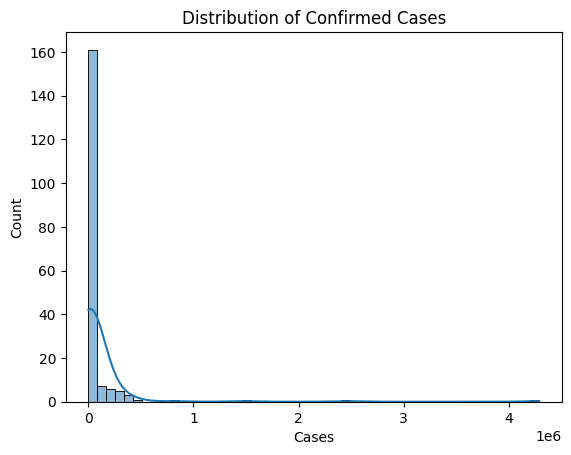

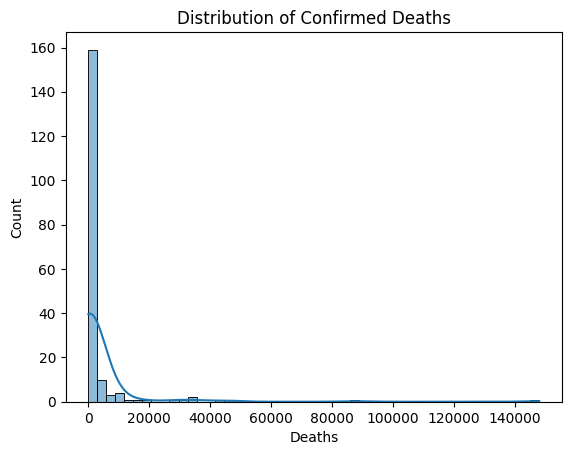

In [25]:
# DATA ANALYSIS
# Summary statistics
print(df.describe())

# Descriptive analysis: distribution of confirmed cases and deaths
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df['Cases'], bins=50, kde=True)
plt.title('Distribution of Confirmed Cases')
plt.show()

sns.histplot(df['Deaths'], bins=50, kde=True)
plt.title('Distribution of Confirmed Deaths')
plt.show()

In [26]:
# Prescriptive analysis to recommended actions based on the analysis

# Calculate the high death rate countries
high_death_rate_countries = df.groupby('Country', group_keys=False).apply(
    lambda x: x['Deaths'].sum() / x['Cases'].sum()
).sort_values(ascending=False).head(10)

print(high_death_rate_countries)

Country
Yemen             0.285630
United Kingdom    0.151948
Belgium           0.147859
Italy             0.142566
France            0.137108
Hungary           0.133993
Netherlands       0.115328
Mexico            0.111310
Spain             0.104368
Western Sahara    0.100000
dtype: float64


C:\Users\Mesoma\AppData\Local\Temp\ipykernel_30696\2317652850.py:4: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  high_death_rate_countries = df.groupby('Country', group_keys=False).apply(


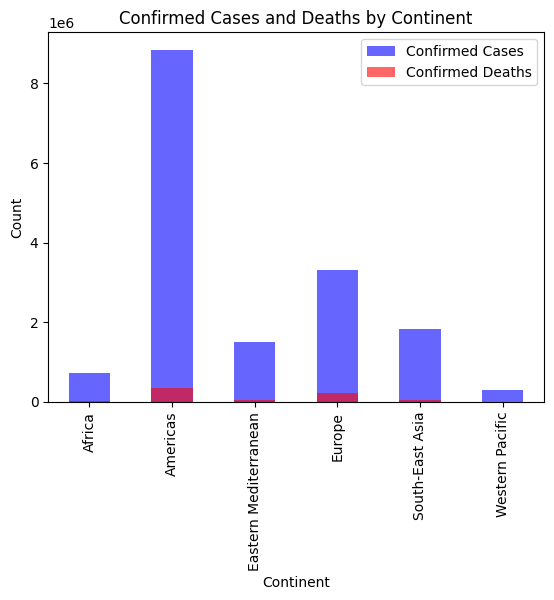

In [27]:
# COMPARATIVE ANALYSIS

# Compare cases and deaths across continents using bar chart
continent_cases = df.groupby('Continent')['Cases'].sum()
continent_deaths = df.groupby('Continent')['Deaths'].sum()

# Bar plot for cases and deaths by continent
continent_cases.plot(kind='bar', color='blue', alpha=0.6, label='Confirmed Cases')
continent_deaths.plot(kind='bar', color='red', alpha=0.6, label='Confirmed Deaths')
plt.title('Confirmed Cases and Deaths by Continent')
plt.xlabel('Continent')
plt.ylabel('Count')
plt.legend()
plt.show()

In [ ]:
# From the above comparative analysis, we can see that the continent - 'Americas' had the highest number of confirmed cases and deaths
# The continent - 'Western Pacific' had the lowest number of confirmed cases.

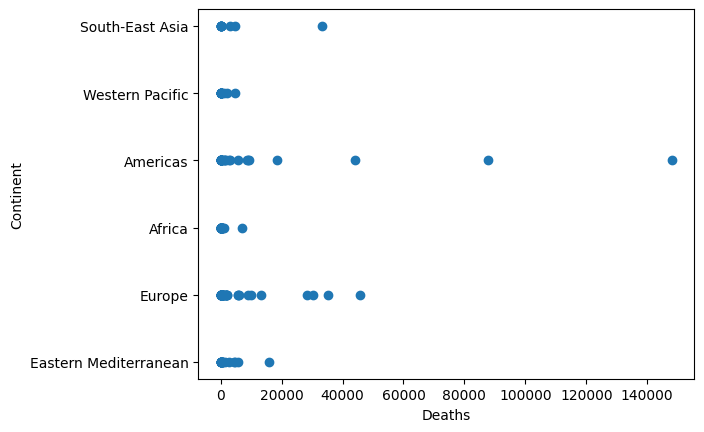

In [36]:
# Scatter plot

plt.scatter(x = df['Deaths'], y = df['Continent'])
plt.xlabel('Deaths')
plt.ylabel('Continent')
plt.show()

In [37]:
# Save DataFrame to Excel
df.to_excel('covid_dataset_by_country.xlsx', index=False)